# Приоритизация гипотез

У нас есть 9 гипотез по увеличению выручки интернет-магазина. Нужно выбрать какие из них будем проверять в перую очередь.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
df.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
df['ICE'] = round(df['Impact'] * df['Confidence'] / df['Efforts'] , 2)
df.sort_values('ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


<div style="border:solid grey 2px; padding: 30px">По фреймворку ICE в топе по приоритету следующие гипотезы: <br>
1. Гипотеза 8: Запустить акцию, дающую скидку на товар в день рождения
2. Гипотеза 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Гипотеза 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

In [4]:
df['RICE'] = round(df['Reach'] * df['Impact'] * df['Confidence'] / df['Efforts'] , 2)
df.sort_values('RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


<div style="border:solid grey 2px; padding: 30px">Если добавить в оценку приорита гипотез охват пользователей (RICE), то получитсья следующая картина:<br>
1. Гипотеза 8 опустилась на 5-ю позицию, т.к. охват небольшой (день рождения только один раз в год у каждого пользователя).
2. Гипотеза 0 - почти без измений (со 2-ю на 3-ю).
3. Гипотеза 7 поднялась на первую позицию. Видимо, форму увидят все пользователи.
4. Также из-за большого охвата в топ добавилась Гипотеза 2: Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

### Вывод

<div style="border:solid grey 2px; padding: 30px">Для последующей проверки наиболее приоритетными являютс гипотезы 7, 2, 0.

# Анализ A/B-теста

Получены результаты проведения А/В теста, нужно сделать выводы по ним о его успешности.

План:
1. Загрузка данных
2. Расчет показателей по сырым данным
3. Очистка данных
4. Определение статистической значимости различий между группами
5. Общий вывод

## Загрузка и обзор данных для анализа

In [5]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [6]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders['date'] = pd.to_datetime(orders['date'])
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [12]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
              .groupby('date', as_index=False)\
              .agg({'transactionId' : 'nunique', 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428
5,2019-08-06,28,242342
6,2019-08-07,24,225334
7,2019-08-08,27,220918
8,2019-08-09,25,160812
9,2019-08-10,23,107802


<div style="border:solid grey 2px; padding: 30px">Для анализа предоставлены данные по заказам пользователей и сводные данные по дневному количеству визитов пользователей, разделенные по группам. Тест проводился с 01 по 31 августа 2019 года.

## Показатели по сырым данным

### Кумулятивная выручка

In [13]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
                                     .sort_values(by=['date','group'])

In [14]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [15]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [16]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [17]:
cumulativeData[(cumulativeData['date'] > '2019-08-16') & (cumulativeData['group'] == 'B')]

,date,group,orders,buyers,revenue,visitors
33,2019-08-17,B,373,349,2620790,10434
35,2019-08-18,B,382,357,2686621,11171
37,2019-08-19,B,403,377,4116541,11658
39,2019-08-20,B,423,396,4263815,12218
41,2019-08-21,B,437,407,4426892,12874
43,2019-08-22,B,462,427,4589247,13524
45,2019-08-23,B,477,440,4703216,14070
47,2019-08-24,B,493,454,4798722,14448
49,2019-08-25,B,507,466,4901584,15127
51,2019-08-26,B,532,490,5084583,15803


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


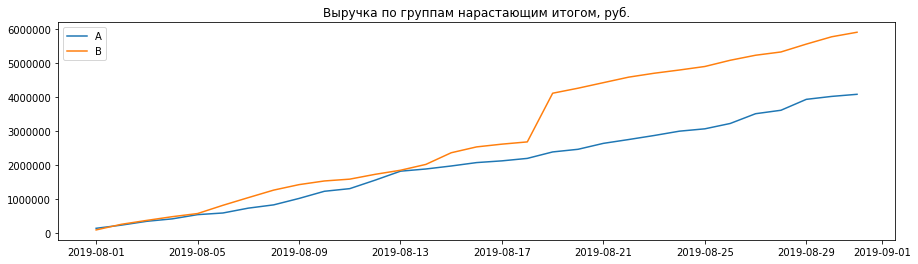

In [18]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,4))
plt.title('Выручка по группам нарастающим итогом, руб.')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.show()

<div style="border:solid grey 2px; padding: 30px">По данным на конец отчетного периода выручка за отчетный период по группе А составила 4,1 млн руб., по группе Б - 5,9 млн руб. При этом видно, 2019-08-19 были сделаны большие продажи по группе Б (в размере 1,4 млн руб.).

### Среднйи чек

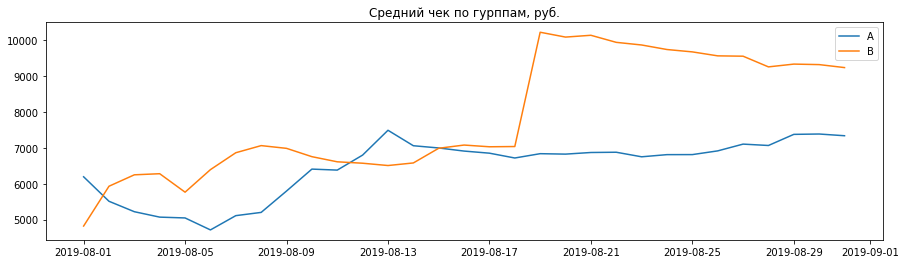

In [19]:
plt.figure(figsize=(15,4))
plt.title('Средний чек по гурппам, руб.')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.show()

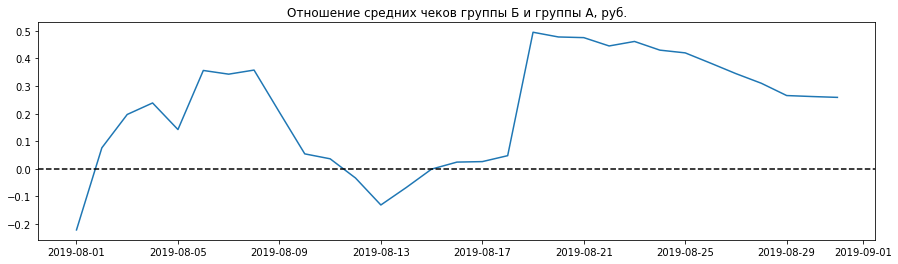

In [20]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,4))
plt.title('Отношение средних чеков группы Б и группы А, руб.')

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


plt.axhline(y=0, color='black', linestyle='--')
#plt.legend()
plt.show()

In [21]:
print('Средний чек на конец периода группы А', round(cumulativeRevenueA[cumulativeRevenueA['date']=='2019-08-31']['revenue'].item() / 
                                                     cumulativeRevenueA[cumulativeRevenueA['date']=='2019-08-31']['orders'].item()))
print('Средний чек на конец периода группы B', round(cumulativeRevenueB[cumulativeRevenueB['date']=='2019-08-31']['revenue'].item() / 
                                                     cumulativeRevenueB[cumulativeRevenueB['date']=='2019-08-31']['orders'].item()))


Средний чек на конец периода группы А 7334
Средний чек на конец периода группы B 9231


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `item` has been deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `item` has been deprecated and will be removed in a future version
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `item` has been deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `item` has been deprecated and will be removed in a future version
  after removing the cwd from sys.path.


<div style="border:solid grey 2px; padding: 30px">Средний чек на конец периода по группе А составил 7 тыс. руб., по группе Б - 9 тыс. руб. Так же как и по выручке на графике видна большая продажа по группе Б 2019-08-19.

### Кумулятивная конверсия

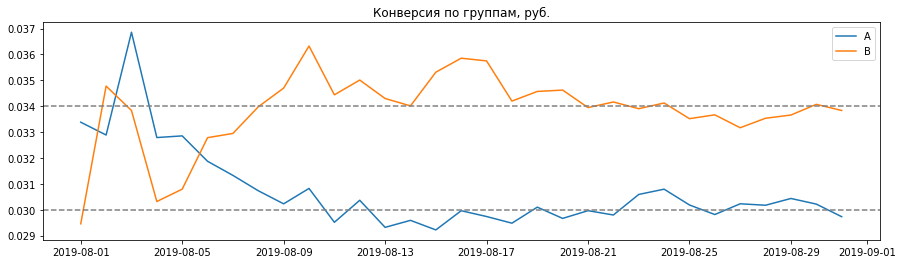

In [22]:

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(15,4))
plt.title('Конверсия по группам, руб.')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axhline(y=0.034, color='grey', linestyle='--')
plt.axhline(y=0.03, color='grey', linestyle='--')
plt.legend()
plt.show()

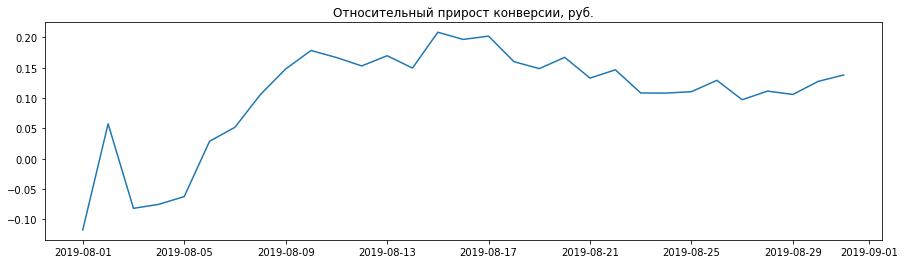

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,4))
plt.title('Относительный прирост конверсии, руб.')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
#plt.legend()
plt.show()
#plt.axhline(y=0, color='black', linestyle='--')
#plt.axhline(y=-0.1, color='grey', linestyle='--')

<div style="border:solid grey 2px; padding: 30px">На 31 августа конверсия за август по группе А составила 3,4%, по группе В - 3%. При этом видно, что измениний их значений с 21 числа практически не происходит.

## Очистка данных

### Количество заказов по пользователям

In [24]:
ordersByUsers = orders.groupby('visitorId')['transactionId'].agg('nunique').reset_index()
ordersByUsers.columns = ['userId','orders']
ordersByUsers

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


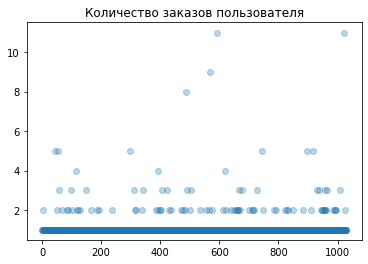

In [25]:
plt.title('Количество заказов пользователя')
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'], alpha=0.3)
plt.show()

In [26]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


<div style="border:solid grey 2px; padding: 30px">95% из 1 030 пользователей совершили за август не более 2 заказов, 99% -  не более 4. Будем считать, что 4 заказа в месяц - верхняя граница типичного пользователя.

### Стиомость заказа

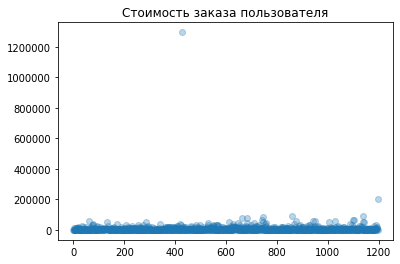

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title('Стоимость заказа пользователя')
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.show()

In [28]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


<div style="border:solid grey 2px; padding: 30px">Стоимость 95% заказов за август не превысила 28 тыс. руб., возьмем эту сумму, как верхнюю границу типичного пользователя. 

## Определяем статистическую значимость различий между группами

### Конверсия по сырым данным

In [29]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
              .groupby('date', as_index=False)\
              .agg({'transactionId' : 'nunique', 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


In [30]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("P-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост конверсии группы B= {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

P-value = 0.008
Относительный прирост конверсии группы B= 0.138


<div style="border:solid grey 2px; padding: 30px">Относительный прирост конверсии по группе Б составил 14%, при этом данный прирост статистически значим (р-значение = 0.008).


### Средний чек по сырым данным

In [31]:
print("P-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value = 0.365
0.259


<div style="border:solid grey 2px; padding: 30px">Относительный прирост среднего чека по группе Б составил 26%, при этом данный прирост не является статистически значимым (р-значение = 0.365).


### Конверсия по очищенным данным

In [32]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
dtype: int64
(59,)


In [33]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.009
0.145


<div style="border:solid grey 2px; padding: 30px">По сравнению с сырыми данными изменений нет

### Средний чек по очищенным данным

In [34]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.481
-0.014


<div style="border:solid grey 2px; padding: 30px">По очищенным данным, в отличии от сырых, средний чек по группе Б не изменился.

## Общий вывод

<div style="border:solid grey 2px; padding: 30px">Был проведен анализ успешности теста по полученным в ходе его проведения данным о заказах и посещениях пользователями за период с 1 по 31 августа 2019 года.<br><br>
По данным на конец отчетного периода выручка за отчетный период по группе А составила 4,1 млн руб., по группе Б - 5,9 млн руб. Средний чек - 7 тыс. руб. и 9 тыс. руб., соответственно. При этом видно, что 2019-08-19 были сделаны большие продажи по группе Б (в размере 1,4 млн руб.)<br>
На 31 августа конверсия за август по группе А составила 3,4%, по группе В - 3%. <br><br>
Для очистки данных были исключены пользователи, поведение которых оличается от типичных (более четырех поупок в месяц, сумма покупки больше 28 тыс. руб.)<br><br>
Результаты проверки гипотез по сырым данным показали, что относительный прирост конверсии группы В в размере 14% явялется статистически значимым, однако относительный прирост среднеко чека на 26% не является статистически значимым.<br>
Результаты проверки гипотез по очищенным данным подтверидили относительный прирост конверсии, по среднему чеку изменения отсутствуют.<br><br>


**Можно признать проведение теста успешным на основании прироста конверсии в тестируемой группе на 14%.**